# Projeto - Machine Learning I

### Prof. Tiago Marto
### Membros do grupo:

- Julia Muto
- Eugênio Pacheco
- Isabella Beserra
- Willker Menezes
- José Venâncio

## Enunciado

Neste módulo, vamos fazer um estudo de caso para práticar a análise dos resultados de um projeto de machine learning, você deverá se reunir em um grupo com de 4 a 5 pessoas e seguir o passo a passo abaixo.

- Escolher um Dataset, valide com o professor se o dataset escolhido é valido :heavy_check_mark:

- Definir uma aplicação de Machine Learning para aplicar ao Dataset: escolhemos como variável dependente (target) a qualidade do sono por meio de classificação

   a. Esta aplicação pode ser uma regressão ou uma classificação para predizer um target a sua escolha.

- Fazer a análise com pelo menos 2 estimadores, comparando os resultados

- Fazer a otimização dos hiperparâmetros, utilizando a metodologia da preferência do grupo

- Fazer a discussão de se o modelo está bom o suficiente para ser aplicado em produção, resolvendo o problema formulado no início

A avaliação sera feita em uma apresentação, com o grupo apresentando e discutindo a metodologia de tratamento dos dados e os resultados obtidos. Pede-se que cada grupo preencha na planilha o dataset escolhido.

## Dataset


Disponível em: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

### Metadados

- Person ID: Identificador para cada indivíduo.
- Gender: Gênero de cada pessoa (Feminino/Masculino)
- Age: Idade da pessoa em anos.
- Occupation: Ocupação ou profissão da pessoa.
- Sleep Duration (hours): Número de horas que a pessoa dorme por dia.
- **Quality of Sleep** (scale: 1-10): Nota subjetiva de qualidade do sono entre 1 e 10.
- Physical Activity Level (minutes/day): Número de minutos que a pessoa realiza atividades físicas diariamente.
- Stress Level (scale: 1-10): Nota subjetiva de nível de stress vivida pela pessoa entre 1 e 10.
- BMI Category: Categoria do IMC de cada pessoa(e.g., ||The BMI category of the person (e.g., Normal, Sobrepeso, Obesidade).
- Blood Pressure (systolic/diastolic): Medição da pressão sanguínea de cada pessoa, indicada por pressão sistólica sobre pressão diastólica.
- Heart Rate (bpm): Batimento cardíaco da pessoa enquanto descansada.
- Daily Steps: Número de passos dados pela pessoa por dia.
- **Sleep Disorder**: Presença ou falta de uma desordem de sono na pessoa (Nenhuma, Insônia, Apnéia do sono).

## Importações

In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Investigação inicial do dataset

In [191]:
df = pd.read_csv("sleep.csv")

In [192]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [193]:
# A coluna ID é uma coluna desnecessária à análise
# Iremos dropá-la logo, para verificação de duplicados posterior.
# Há muitas colunas categóricas/object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [194]:
df.drop(columns=['Person ID'], inplace=True)

In [195]:
# Verificando valores das colunas categóricas/object:
print(df['Gender'].value_counts())
print("-"*50)
print(df['Occupation'].value_counts())
print("-"*50)
print(df['BMI Category'].value_counts())
print("-"*50)
print(df['Blood Pressure'].value_counts())
print("-"*50)
print(df['Sleep Disorder'].value_counts())

Male      189
Female    185
Name: Gender, dtype: int64
--------------------------------------------------
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64
--------------------------------------------------
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64
--------------------------------------------------
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, 

In [196]:
# Verificando a quantidade de registros
df.shape

(374, 12)

In [197]:
df.describe(include='all')

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,None
freq,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


In [198]:
# Não há registros nulos
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [199]:
# Ao dropar a coluna ID verifica-se a existência de muitos registros duplicados
df.duplicated().sum()

242

## Ajuste inicial de dados

In [200]:
# Dropando registros duplicados para evitar data leakage.
# Embora estejam sendo dropados, há certa discussão sobre
# o quão isso impactará no modelo, dado que se os dados são repetidos
# para pessoas diferentes, onde todas as variáveis independentes são iguais
# e resultaram no mesmo valor para a variável dependente, reforça que
# se o modelo aprendesse com esses dados, teriam peso maior para assertividade
# das notas. Desta forma, iremos trazê-los de volta para os dados de treino.
df_duplicados = df[df.duplicated()]
df2 = df.copy(deep=True)
df2.drop_duplicates(inplace=True)
df2.reset_index(drop=True,inplace=True)

### Transformando variáveis categóricas

In [201]:
df2['Gender'] = df2['Gender'].map({'Male':0, 'Female': 1})

In [202]:
df2['BMI Category'] = df2['BMI Category'].map({'Normal Weight': 0, 'Normal':0, 'Obese': 2, 'Overweight': 1})

In [203]:
# calculo da pressão arterial media (MAP):
# MAP = (sistolica + 2x diastolica)/3
#normal = abaixo de 90
#elevado = entre 90 e 92
#hipertensão 1 = entre 92 e 96
#hipertensão 2 = acima de 96

#Separando a coluna "Blood Pressure" (Pressão Sanguínea) em pressões sistólica e diastólica
systolic = df2['Blood Pressure'].apply(lambda x: x.split('/')[0]).apply(lambda x: int(x))
diastolic = df2['Blood Pressure'].apply(lambda x: x.split('/')[1]).apply(lambda x: int(x))

map = []
for measure in range(len(systolic)):
  map.append(round((systolic[measure] + (2*diastolic[measure]))/3,1))

df2['MAP'] = map

In [ ]:
<img src="https://www.ahajournals.org/cms/asset/b2c3515a-24fc-4f7b-9c3a-a195a1ee5350/hypertensionaha.120.14929.fig03.jpg" width=360 height=315>

https://www.ahajournals.org/doi/10.1161/HYPERTENSIONAHA.120.14929

In [204]:
df2

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,MAP
0,0,27,Software Engineer,6.1,6,42,6,1,126/83,77,4200,None,97.3
1,0,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None,95.0
2,0,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,106.7
3,0,28,Software Engineer,5.9,4,30,8,2,140/90,85,3000,Insomnia,106.7
4,0,29,Teacher,6.3,6,40,7,2,140/90,82,3500,Insomnia,106.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1,59,Nurse,8.0,9,75,3,1,140/95,68,7000,None,110.0
128,1,59,Nurse,8.1,9,75,3,1,140/95,68,7000,None,110.0
129,1,59,Nurse,8.2,9,75,3,1,140/95,68,7000,Sleep Apnea,110.0
130,1,59,Nurse,8.0,9,75,3,1,140/95,68,7000,Sleep Apnea,110.0


## Visualização dos dados

Vamos investigar como se comportam as distribuições dos parâmetros do dataset

### Duração do Sono

<AxesSubplot: xlabel='Sleep Duration', ylabel='Count'>

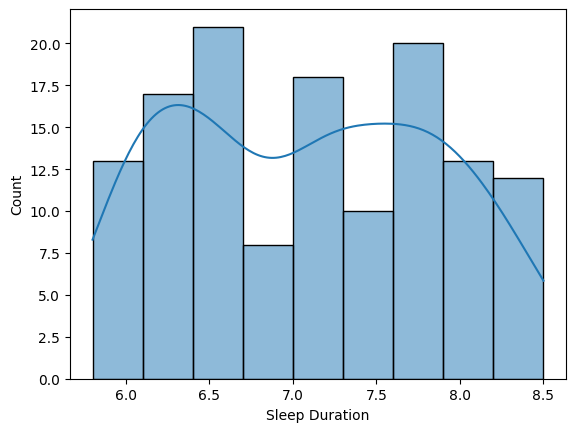

In [205]:
sns.histplot(df2, x="Sleep Duration", kde=True)

### Qualidade do Sono

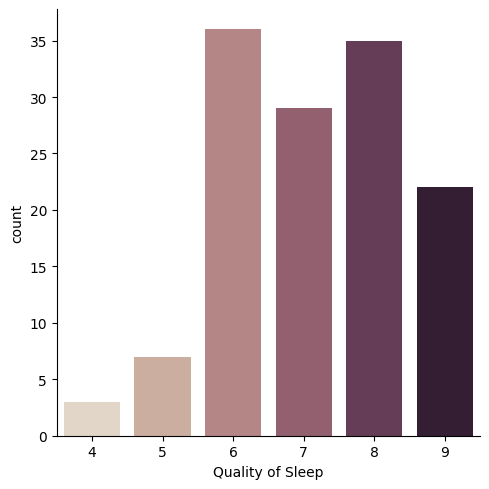

In [206]:
sns.catplot(df2, x="Quality of Sleep", kind="count", palette="ch:.25")

<AxesSubplot: xlabel='Quality of Sleep'>

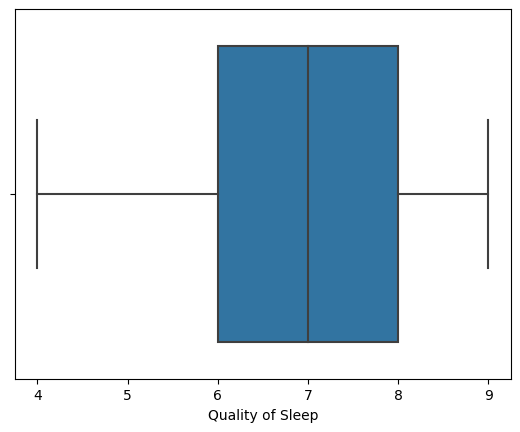

In [207]:
sns.boxplot(df2, x="Quality of Sleep")

### Nível de atividade física

<AxesSubplot: xlabel='Physical Activity Level', ylabel='Count'>

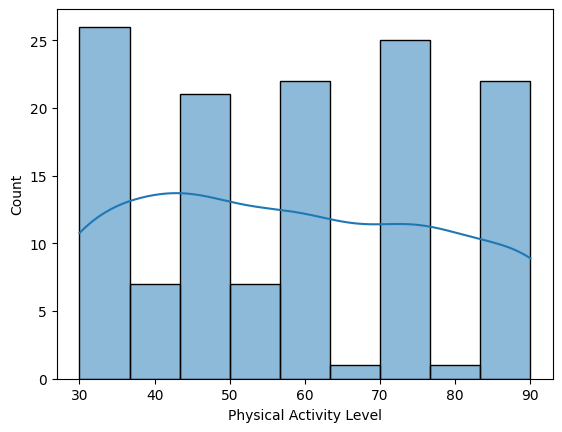

In [208]:
sns.histplot(df2, x="Physical Activity Level", kde=True)

### Nível de Stress

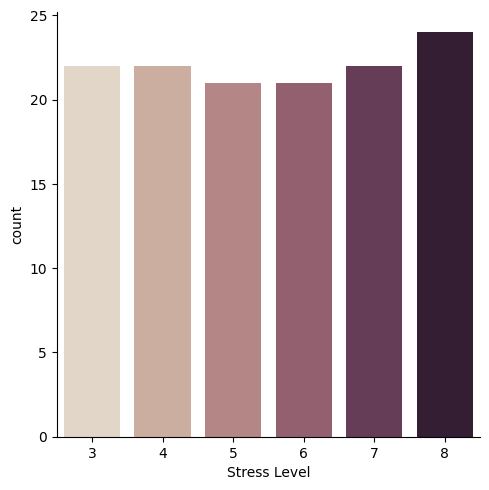

In [209]:
sns.catplot(df2, x="Stress Level", kind="count", palette="ch:.25")

### Categoria do IMC

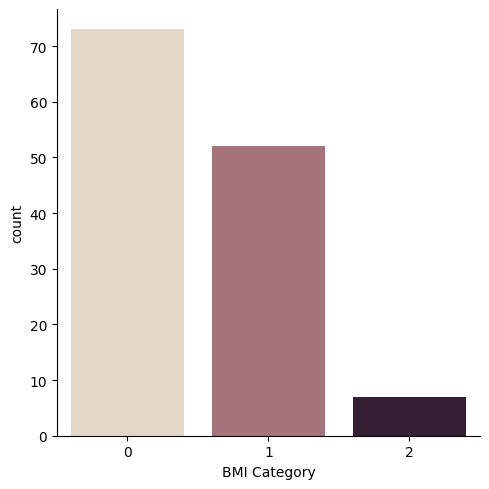

In [210]:
sns.catplot(df2, x="BMI Category", kind="count", palette="ch:.25")

### Batimento Cardíaco

<AxesSubplot: xlabel='Heart Rate', ylabel='Count'>

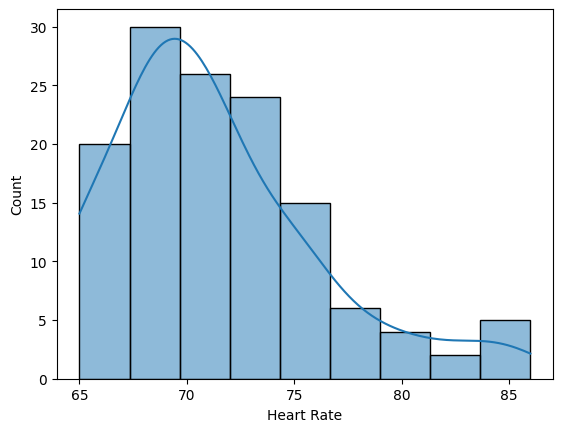

In [211]:
sns.histplot(df2, x="Heart Rate", kde=True)

### Passos Diários

<AxesSubplot: xlabel='Daily Steps', ylabel='Count'>

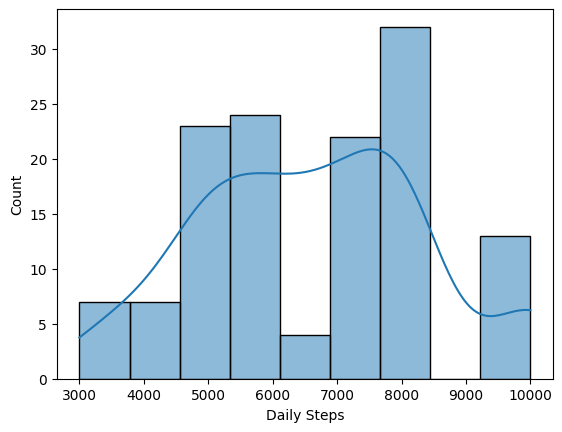

In [212]:
sns.histplot(df2, x="Daily Steps", kde=True)

### Desordem de Sono

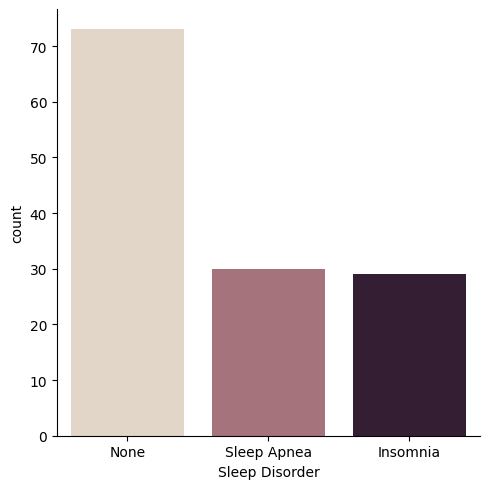

In [213]:
sns.catplot(df2, x="Sleep Disorder", kind="count", palette="ch:.25")

### Ocupação

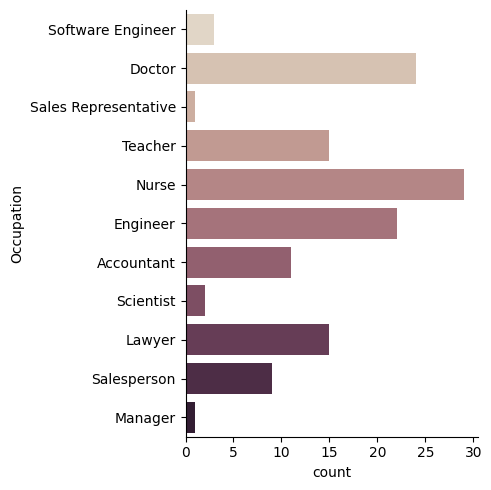

In [214]:
sns.catplot(df2, y="Occupation", kind="count", palette="ch:.25")

### Distribuições relacionais par a par

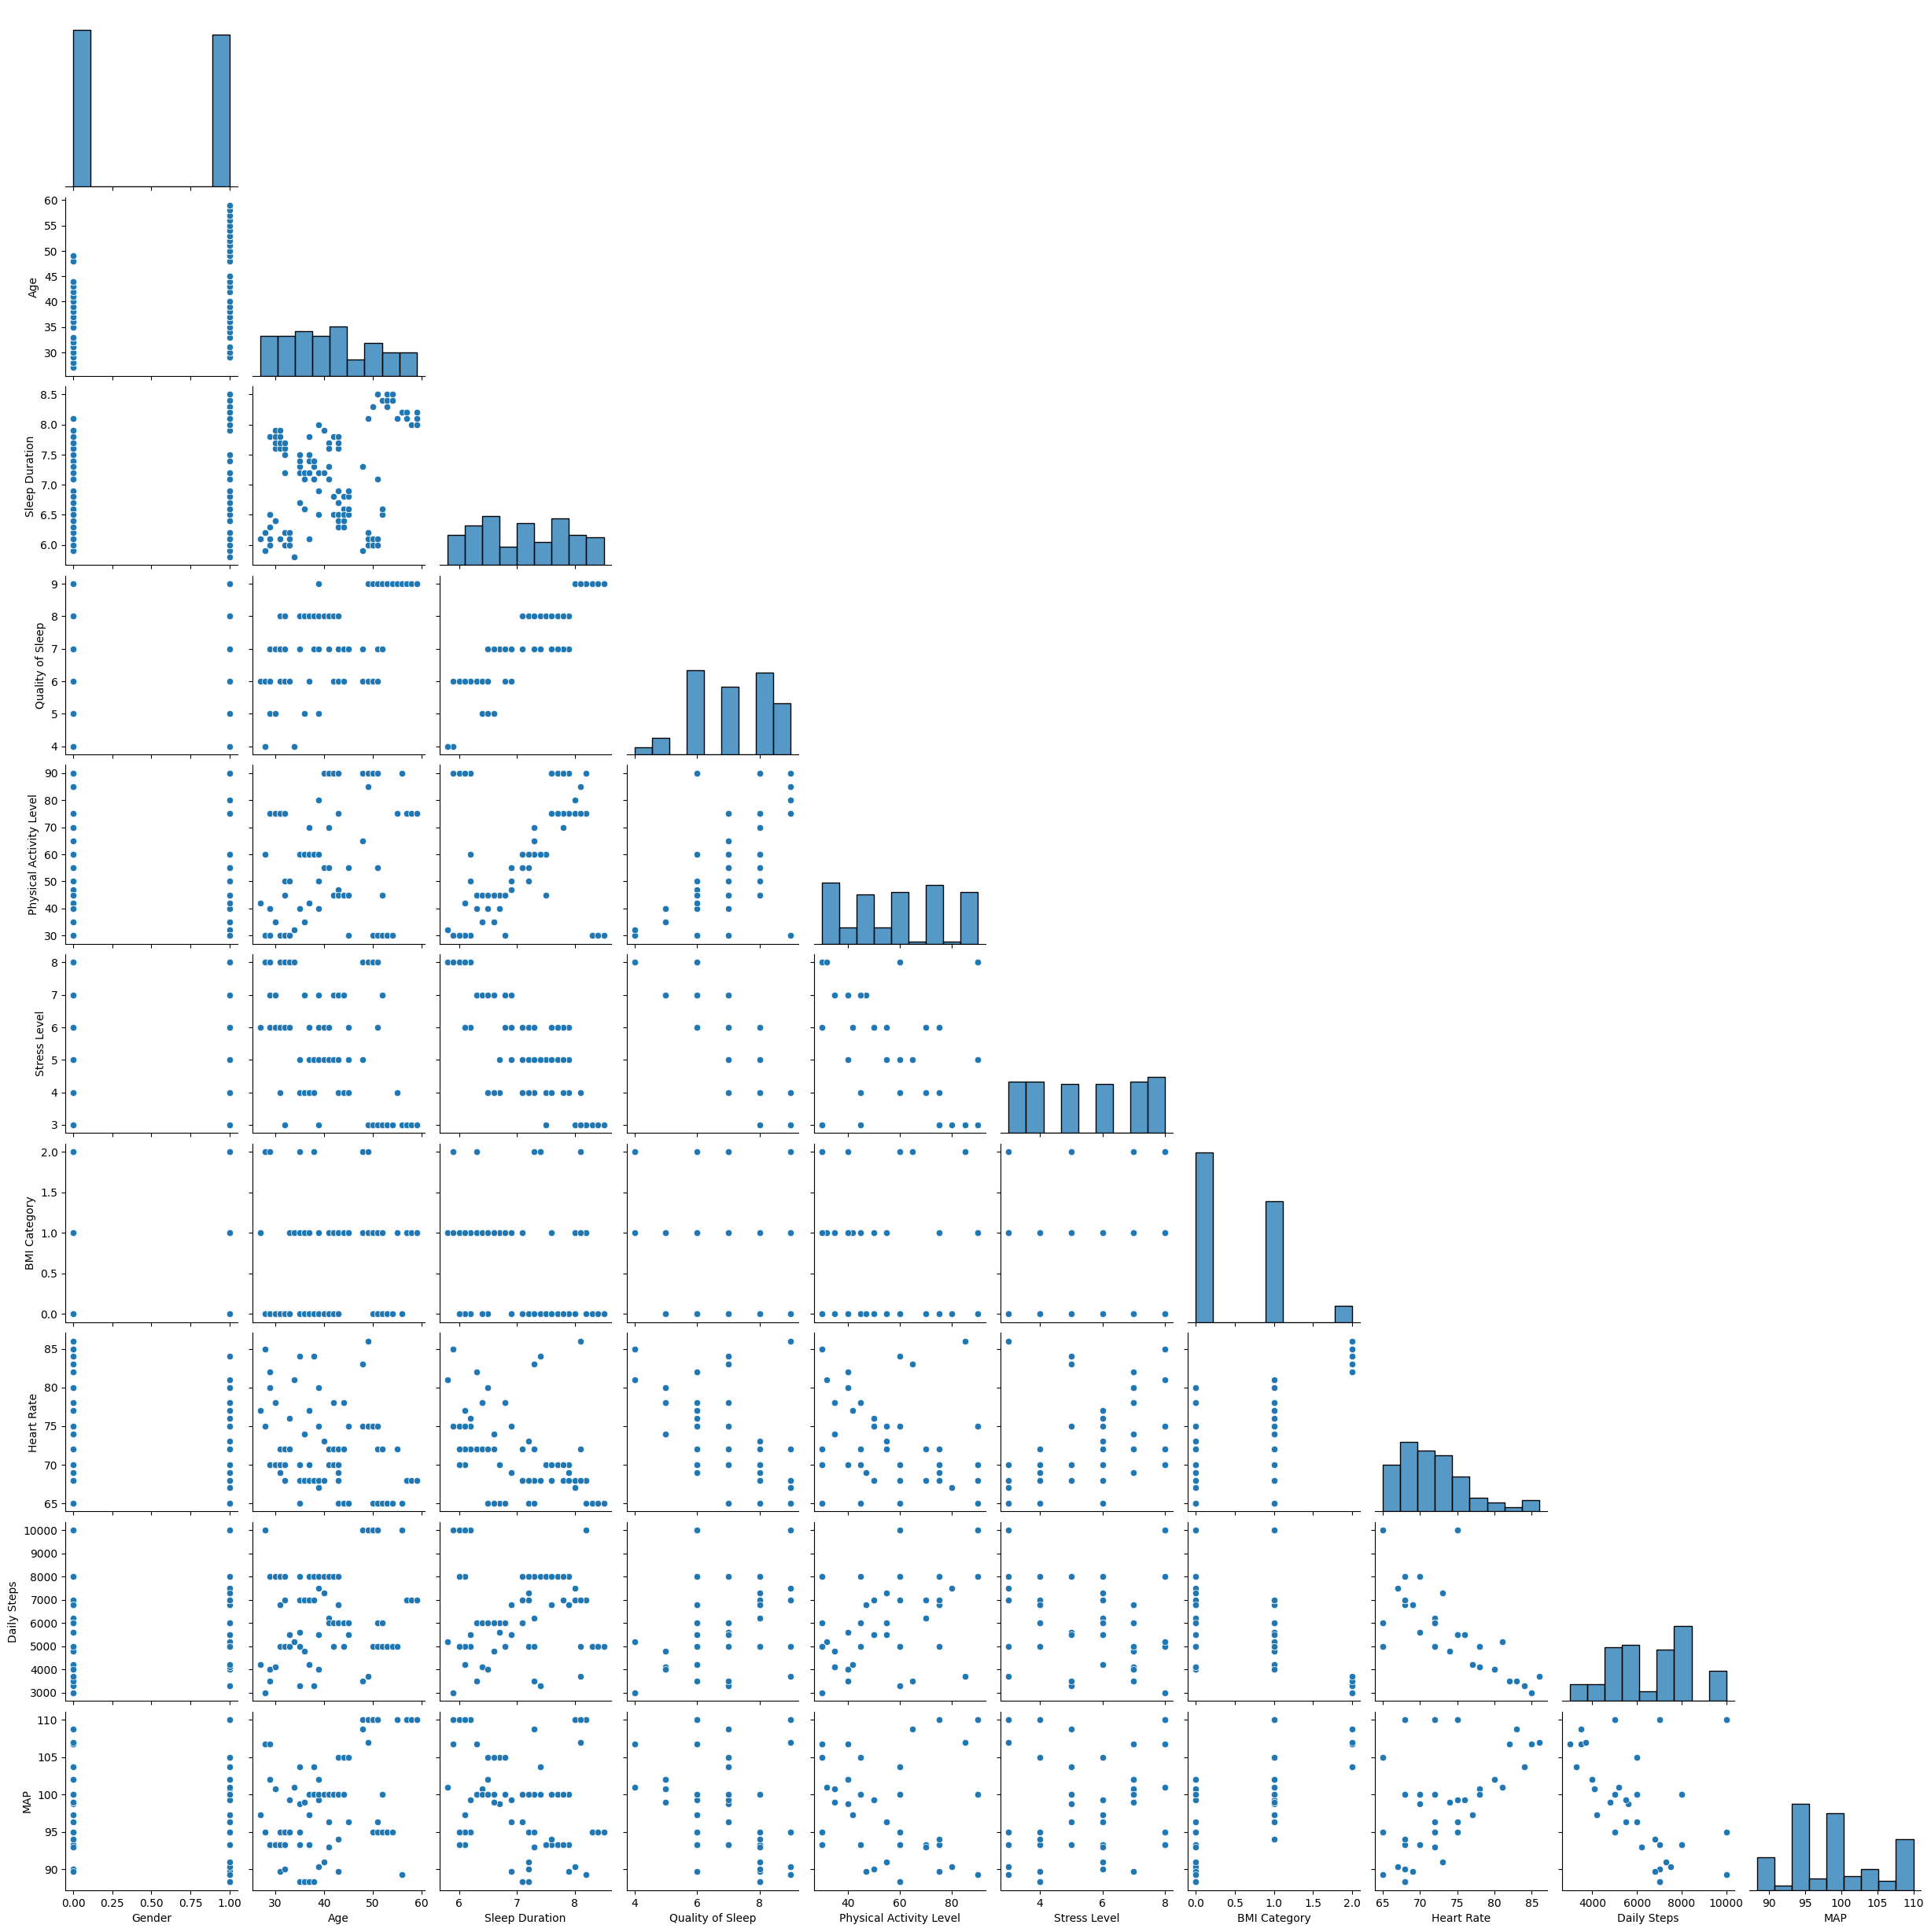

In [215]:
sns.pairplot(df2, corner=True)

## Transformações

### Variável dependente (Target)

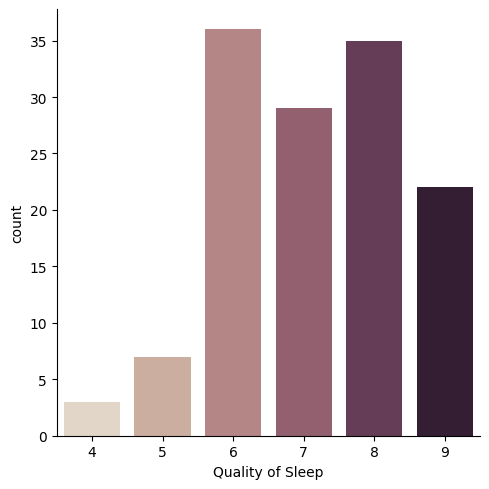

In [216]:
sns.catplot(df2, x="Quality of Sleep", kind="count", palette="ch:.25")

In [217]:
# Para balancear os dados, optamos por considerar que bom sono
# tem nota de 8 pra cima e sono não tão bom tem nota de 7 para baixo.
df2['Quality of Sleep_bin'] = df2['Quality of Sleep'].apply(lambda x : 1 if x > 7 else 0)

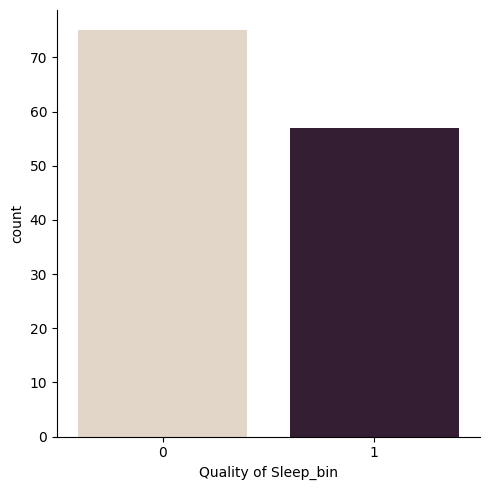

In [218]:
sns.catplot(df2, x="Quality of Sleep_bin", kind="count", palette="ch:.25")

Em vez de nota, separamos em bom (1) e ruim (0). A separação foi baseada na busca por um equilíbrio maior entre as categorias

### Variaveis Independentes (parâmetros/features)

#### Categoria de IMC

In [219]:
df2 = pd.get_dummies(df2, columns=["BMI Category"], prefix="BMI Category", drop_first=True)

#### Desordem de Sono

In [220]:
df2 = pd.get_dummies(df2, columns=["Sleep Disorder"], prefix="Sleep Disorder")

In [221]:
df2.drop(columns="Sleep Disorder_None", axis=1, inplace=True)

#### Ocupação

In [222]:
df2 = pd.get_dummies(df2, columns=["Occupation"], prefix="Occupation", drop_first=True)

## Ajustes prévios à modelagem

In [223]:
df2.drop(columns=["Quality of Sleep", 'Blood Pressure'], axis=1, inplace=True)

## Análise de correlações

<AxesSubplot: >

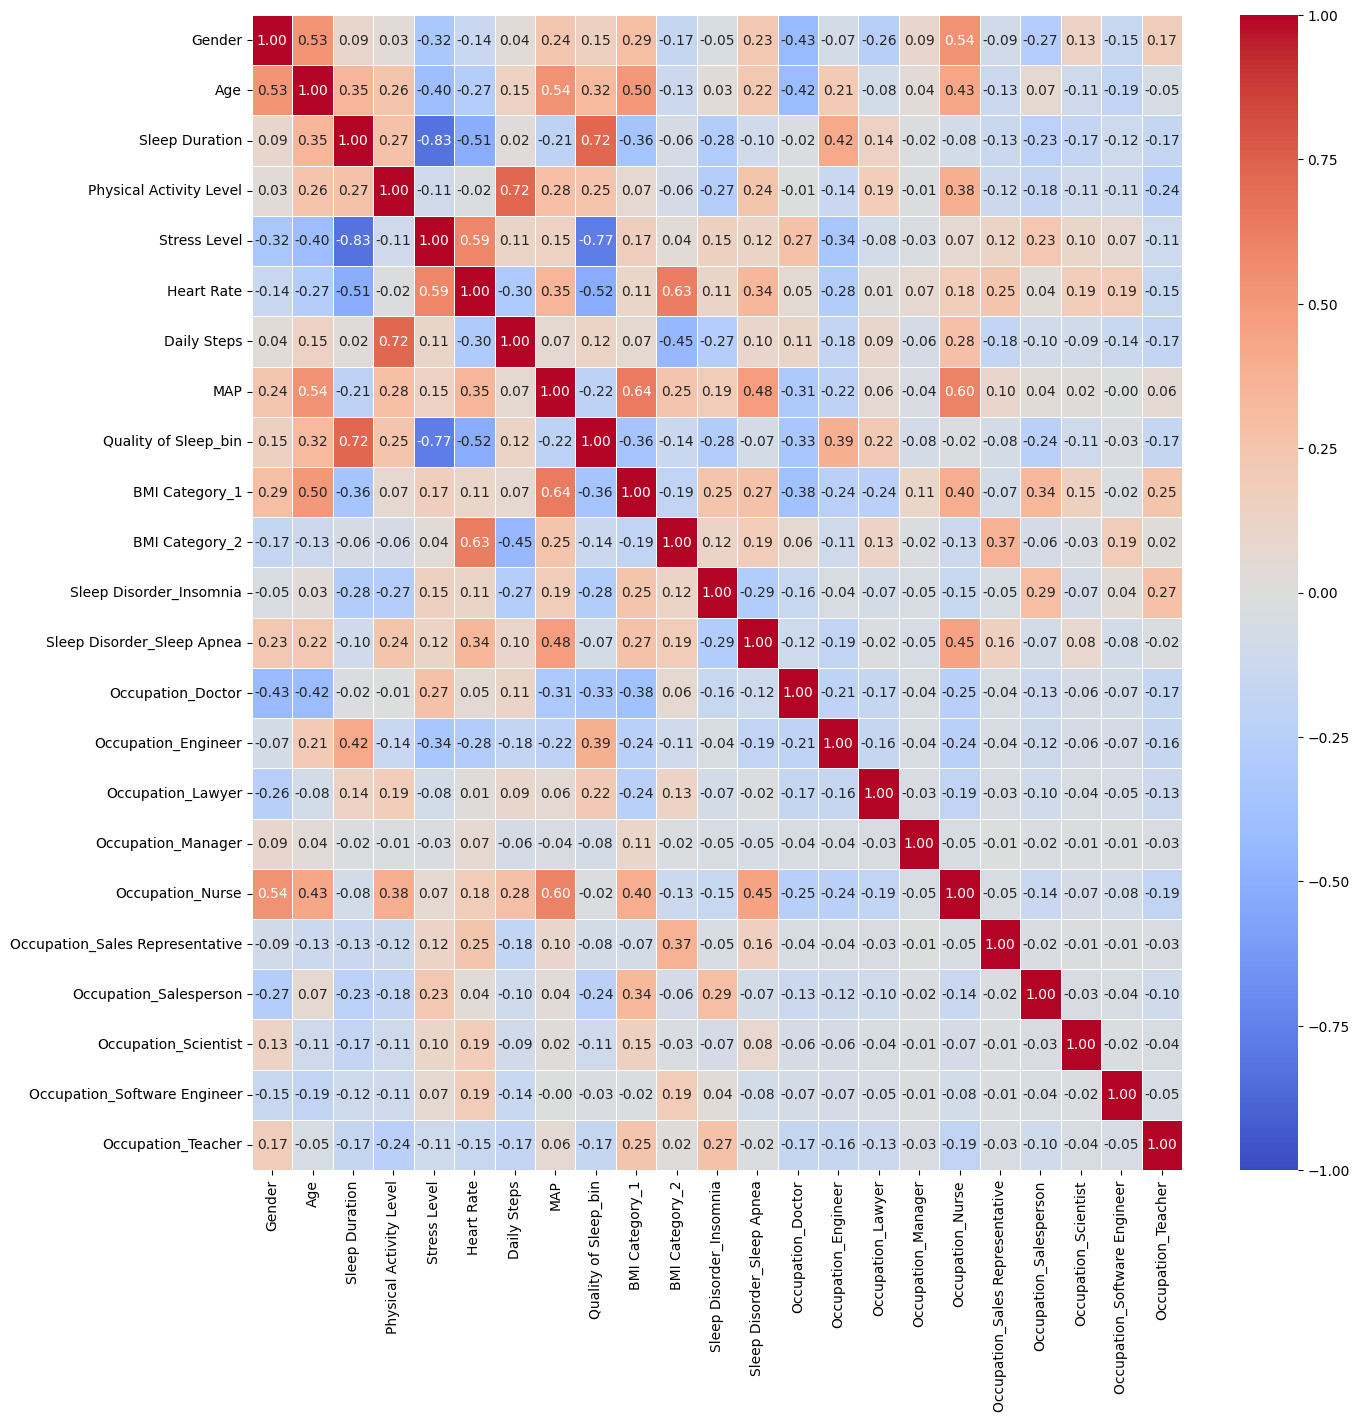

In [224]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')

Baseados no heatmap, faz sentido droparmos:
- Daily Steps (multicolinearidade com "Physical Activity Level", que explica melhor)
- Sleep Disorder_Apnea (multicolinearidade com "Mean Arterial Pressure", que explica melhor)

(https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

In [225]:
df2.drop(columns=["Daily Steps", "Sleep Disorder_Sleep Apnea"], axis=1, inplace=True)

<AxesSubplot: >

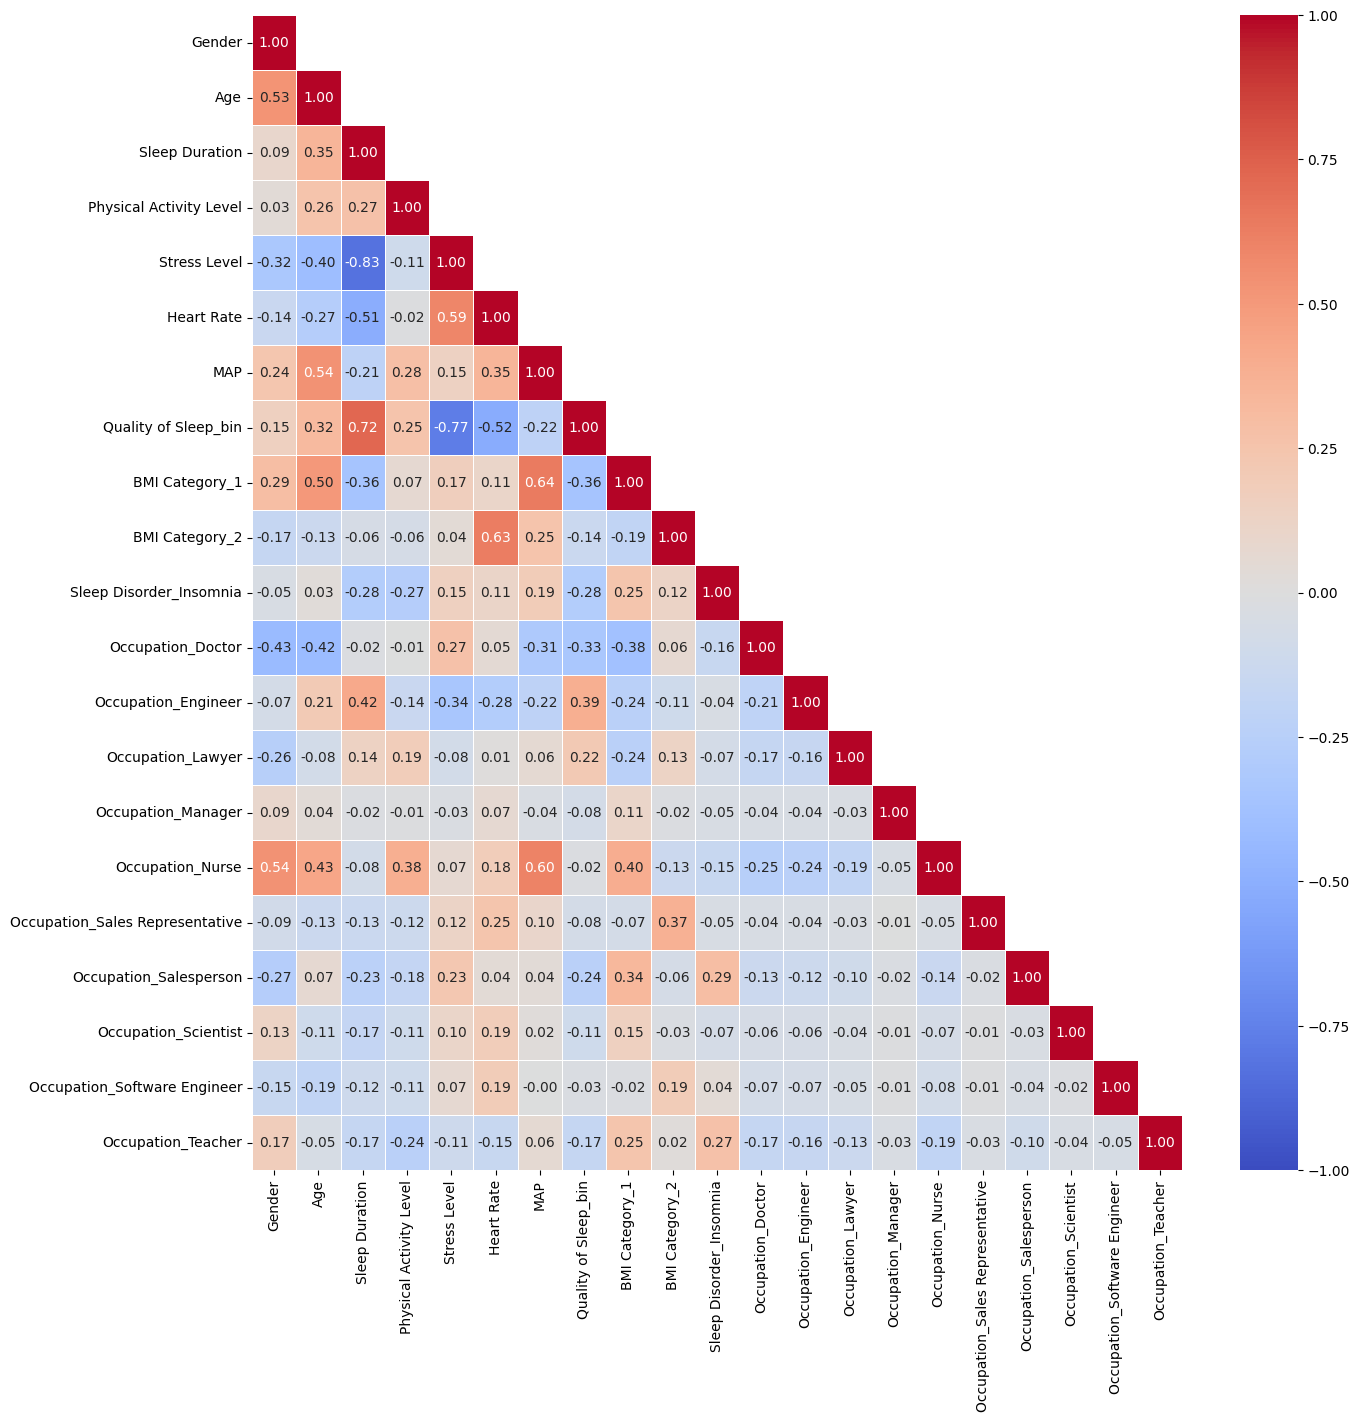

In [226]:
mask = np.triu(df2.corr())
np.fill_diagonal(mask, False)
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f', mask=mask)

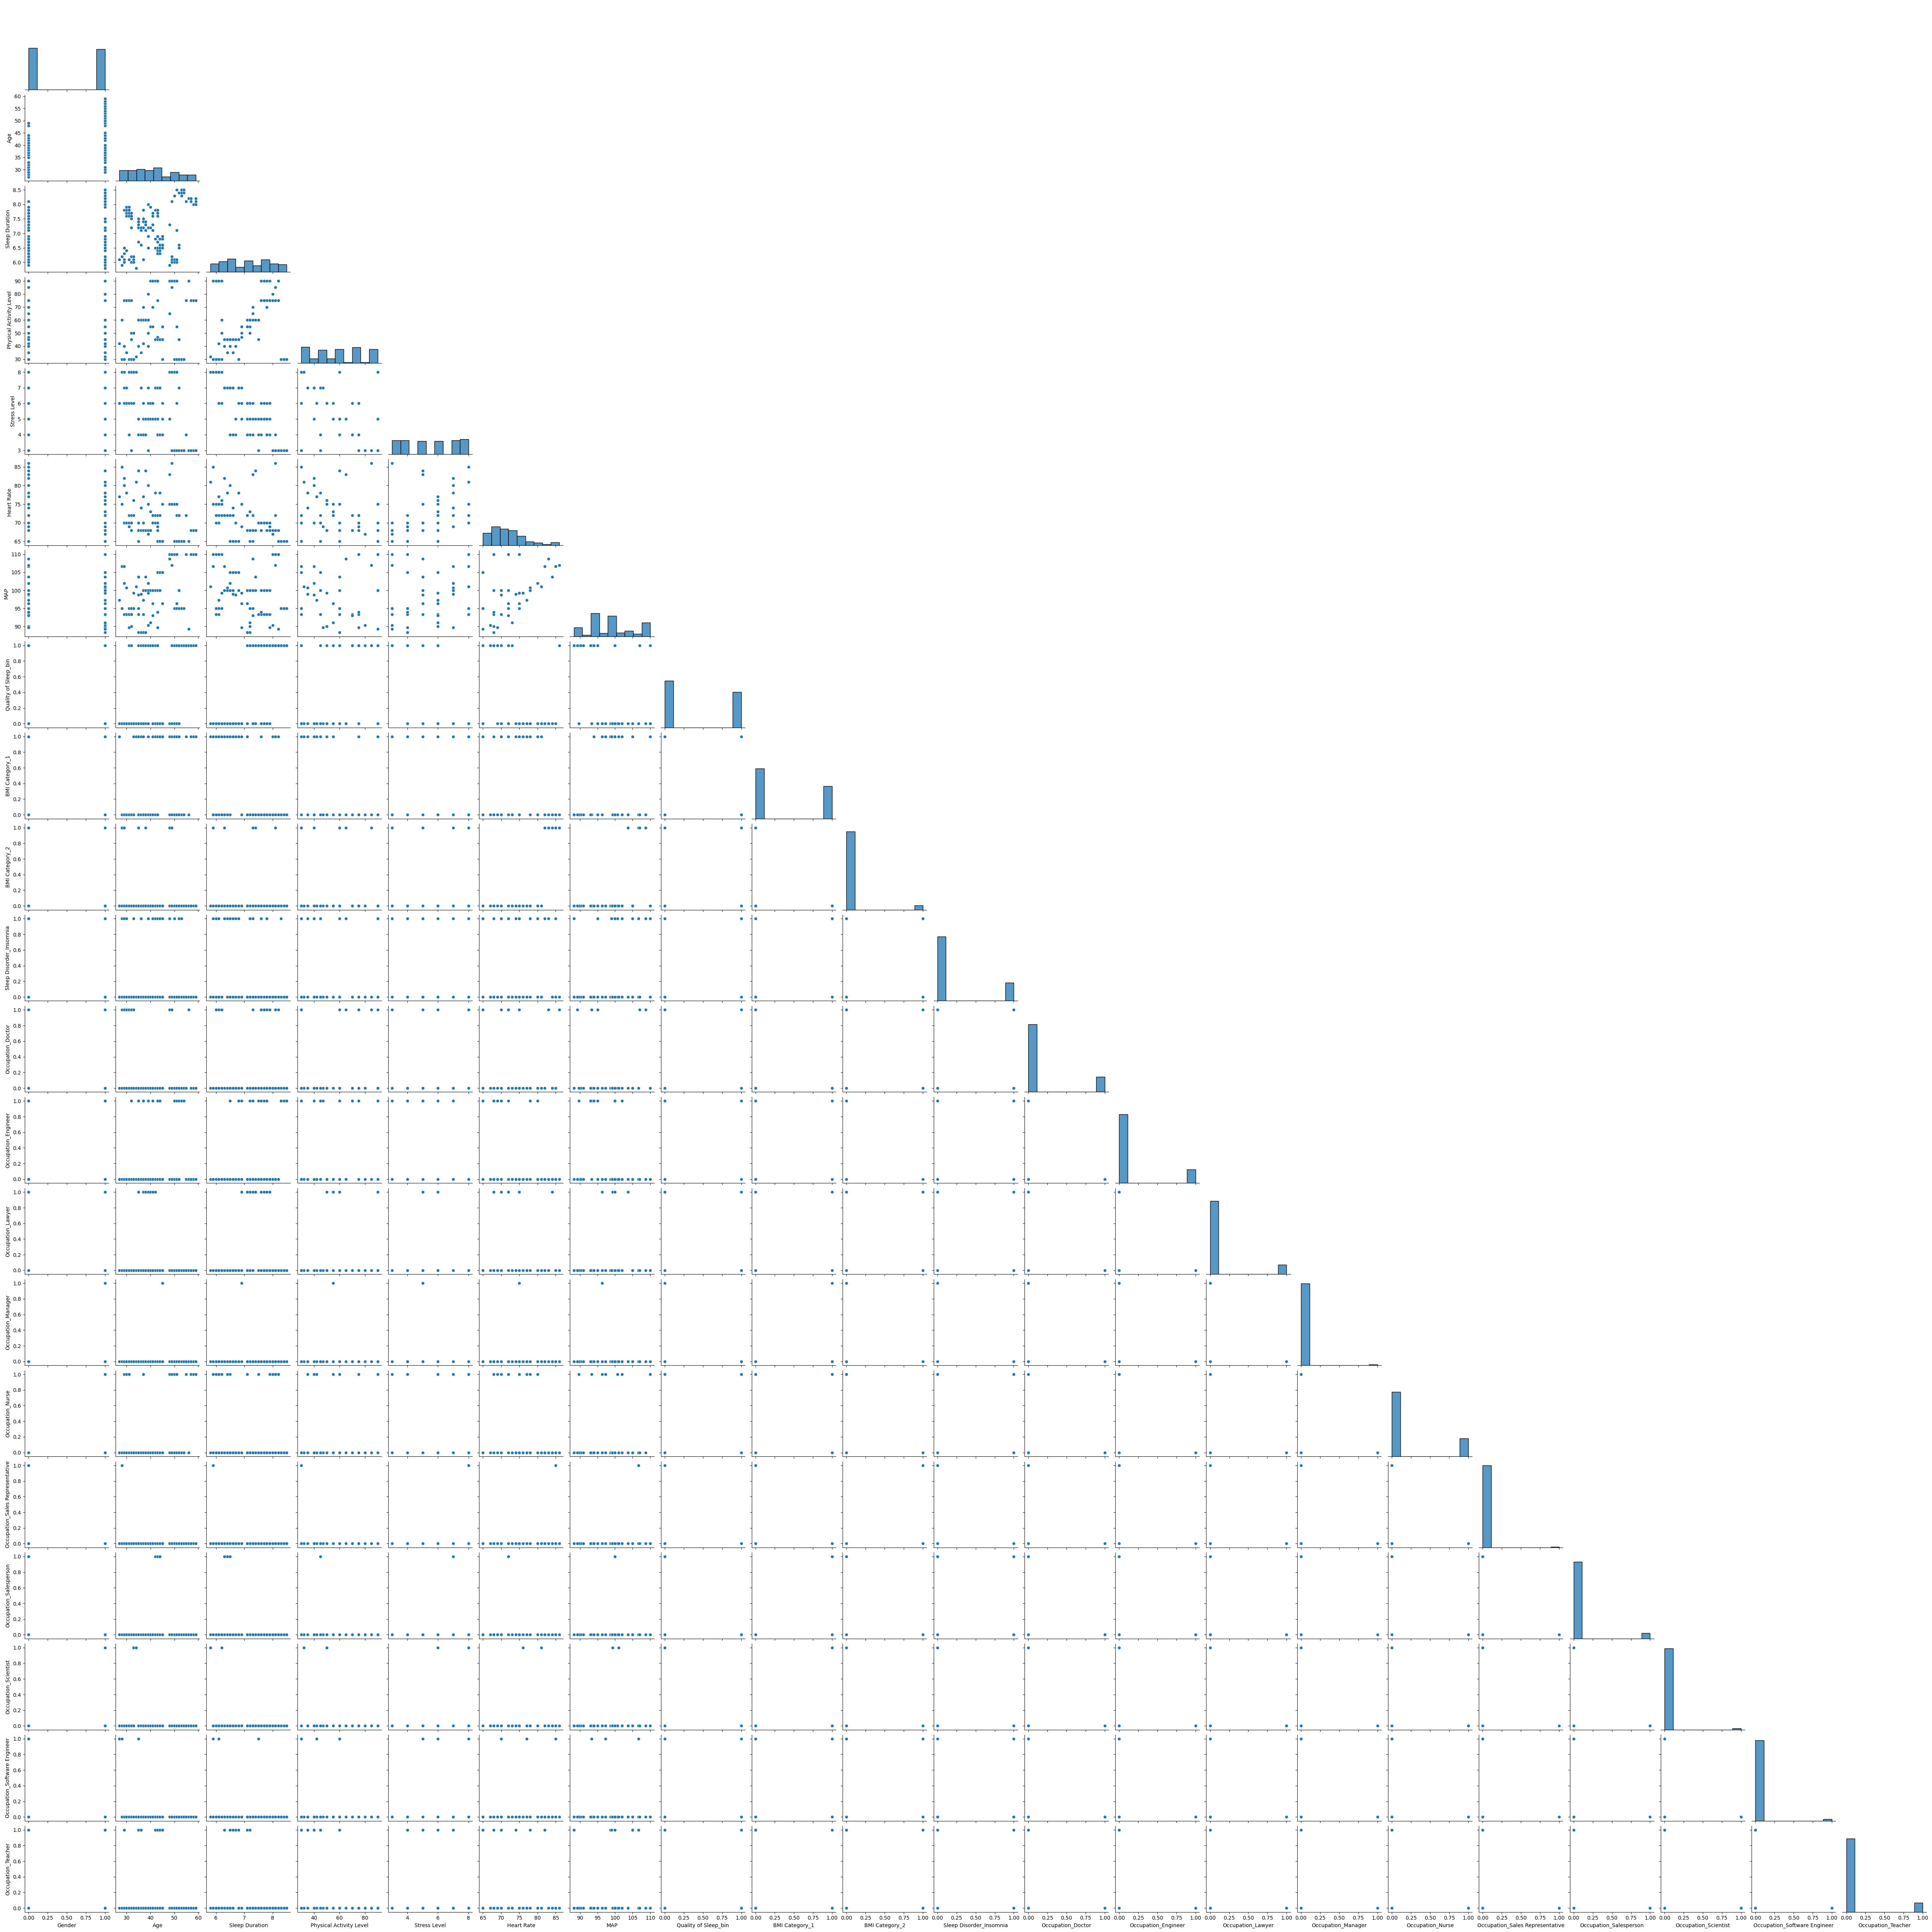

In [227]:
sns.pairplot(df2, corner=True)

In [228]:
df2.head(20)

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,MAP,Quality of Sleep_bin,BMI Category_1,BMI Category_2,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,0,27,6.1,42,6,77,97.3,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,28,6.2,60,8,75,95.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,28,5.9,30,8,85,106.7,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,28,5.9,30,8,85,106.7,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,29,6.3,40,7,82,106.7,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,29,7.8,75,6,70,93.3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,29,6.1,30,8,70,93.3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,29,6.0,30,8,70,93.3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,1,29,6.5,40,7,80,102.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,29,6.0,30,8,70,93.3,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Modelagem

### Preparação e separação dos dados, prévia para todos os estimadores

In [289]:
# Separando em Target e Features
y = df2['Quality of Sleep_bin']
X = df2.drop(columns=["Quality of Sleep_bin"])

In [290]:
# Separando dados para grupos de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

### Regressão Logística (Baseline)

In [291]:
# Criando pipeline
etapas = [("std_scaler", StandardScaler()),
          ("log_reg", LogisticRegression())]

pipe = Pipeline(etapas)

In [292]:
# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [293]:
# Otimizando hiperparâmetros:
param_grid = {
    "log_reg__penalty" : ["", "l1", "l2", "elasticnet"],
    "log_reg__solver"  : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__penalty': ['', 'l1', 'l2', 'elasticnet'],
                         'log_reg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                             'newton-cholesky', 'sag',
                                             'saga']},
             scoring=make_scorer(accuracy_score))

In [294]:
grid.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(penalty='l1', solver='saga'))])

In [295]:
# Aparentemente os parâmetros padrões foram os melhores
grid.best_params_

{'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}

In [296]:
# Melhor métrica com os melhores parâmetros
grid.best_score_

0.968888888888889

#### Avaliando a generalização:

[[22  1]
 [ 1 16]]


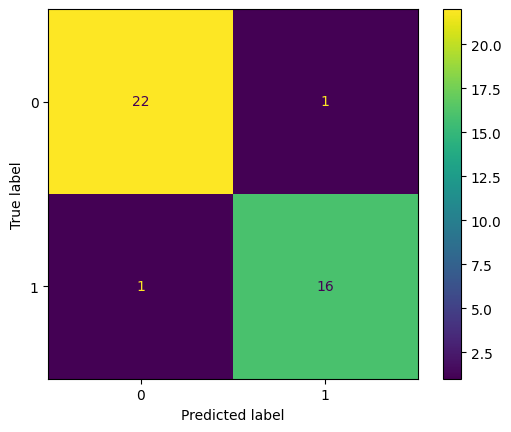

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.94      0.94        17

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40


# ====================

[[52  0]
 [ 0 40]]


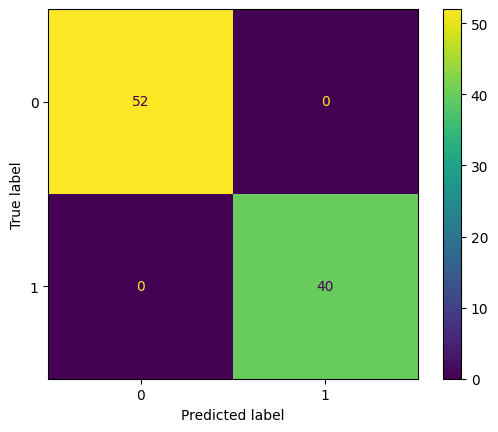

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        40

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [297]:
print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### K Nearest Neighbors

In [298]:
# Criando pipeline
etapas = [("std_scaler", StandardScaler()),
          ("knn", KNeighborsClassifier())]

pipe = Pipeline(etapas)

In [299]:
# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [300]:
# Otimizando hiperparâmetros:
param_grid = {
    "knn__weights" : ["distance", "uniform"],
    "knn__metric" : ["manhattan", "euclidean", "minkowski"],
    "knn__n_neighbors" : range(3, 20)
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             scoring=make_scorer(accuracy_score))

In [301]:
grid.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=15,
                                      weights='distance'))])

In [302]:
grid.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 15,
 'knn__weights': 'distance'}

In [303]:
# Melhor métrica com os melhores parâmetros
grid.best_score_

0.9677777777777777

#### Avaliando a generalização:

[[22  1]
 [ 0 17]]


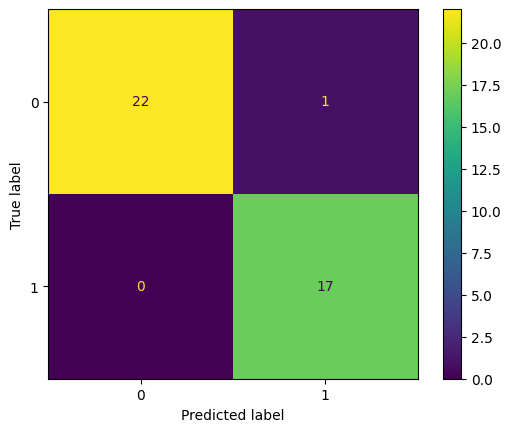

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


# ====================

[[52  0]
 [ 0 40]]


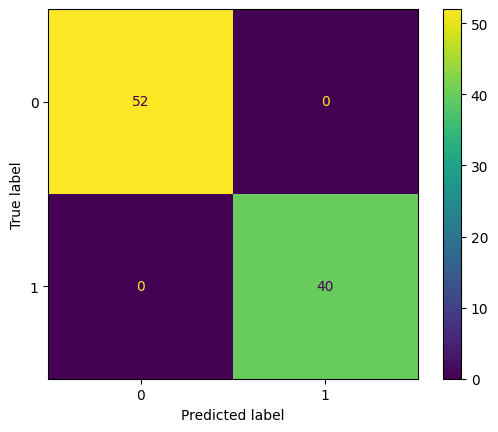

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        40

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [304]:
print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### Árvore de decisão

In [308]:
# Criando pipeline
etapas = [("std_scaler", StandardScaler()),
          ("dt", DecisionTreeClassifier(random_state=42))]

pipe = Pipeline(etapas)

In [309]:
# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [310]:
# Otimizando hiperparâmetros:
param_grid = {
    "dt__criterion" : ["gini", "entropy"],
    "dt__splitter" : ["best", "random"],
    "dt__max_depth" : range(2, 11)
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(2, 11),
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(accuracy_score))

In [311]:
grid.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 4, 'dt__splitter': 'random'}

In [312]:
# Melhor métrica com os melhores parâmetros
grid.best_score_

0.9688888888888888

#### Avaliando a generalização:

[[22  1]
 [ 0 17]]


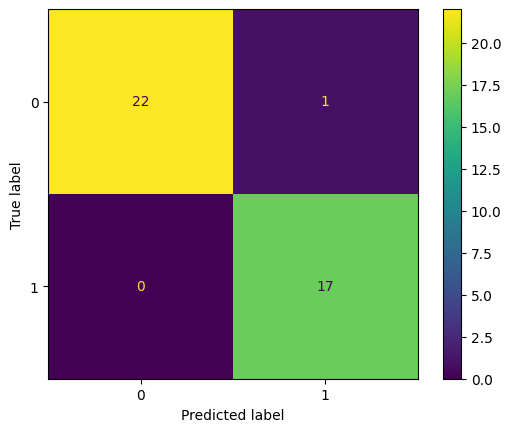

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


# ====================

[[51  1]
 [ 1 39]]


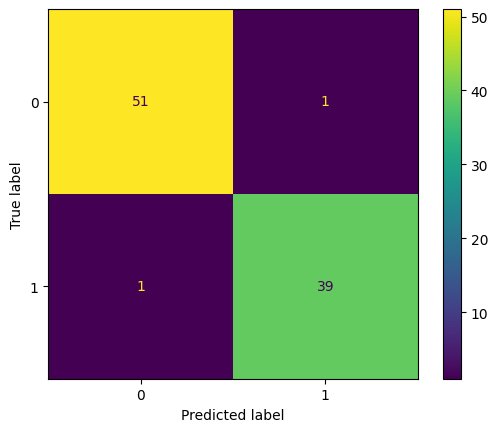

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.97      0.97      0.97        40

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



In [313]:
print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### Random Forest Classifier

In [318]:
# Criando pipeline
etapas = [("std_scaler", StandardScaler()),
          ("rf", RandomForestClassifier(random_state=42))]

pipe = Pipeline(etapas)

In [319]:
# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [320]:
# Otimizando hiperparâmetros:
param_grid = {
    "rf__n_estimators" : range(100, 600, 100),
    "rf__max_depth" : range(3, 6),
    "rf__max_features" : ['sqrt', 'log2'],
    "rf__criterion" : ['entropy', 'gini']
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['entropy', 'gini'],
                         'rf__max_depth': range(3, 6),
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': range(100, 600, 100)},
             scoring=make_scorer(accuracy_score))

In [322]:
grid.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 3,
 'rf__max_features': 'sqrt',
 'rf__n_estimators': 100}

In [323]:
# Melhor métrica com os melhores parâmetros
grid.best_score_

0.9577777777777777

#### Avaliando generalização:


Métricas de avaliação de teste:
[[21  2]
 [ 0 17]]


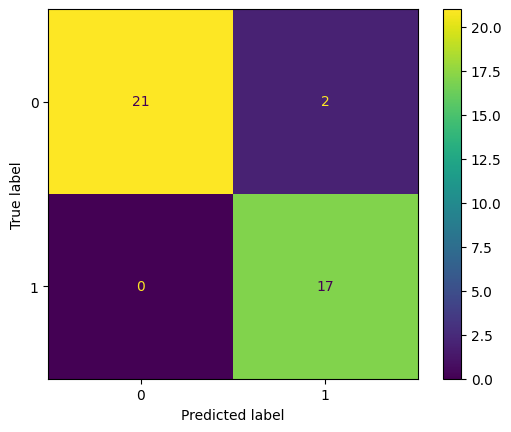

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.89      1.00      0.94        17

    accuracy                           0.95        40
   macro avg       0.95      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40


# ====================


Métricas de avaliação de treino:

Métricas de avaliação de treino:
[[51  1]
 [ 0 40]]


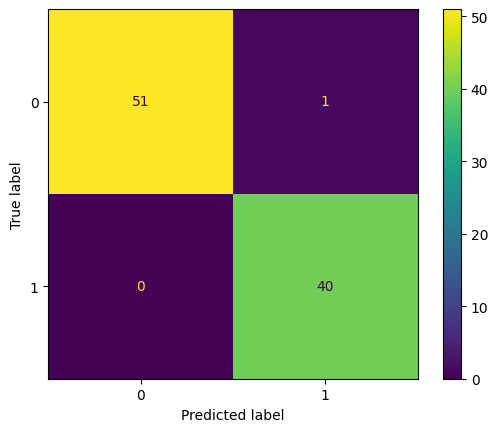

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.98      1.00      0.99        40

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



In [321]:
print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

print("\nMétricas de avaliação de treino:")
y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### Cross validation

In [185]:
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

results_cv = cross_validate(estimator=modelo, X=X_train, y=y_train,
                           cv=kf5, scoring="f1",
                           return_train_score=True, return_estimator=True)

In [186]:
df_results_cv = pd.DataFrame(results_cv)

In [187]:
df_results_cv.head()

,fit_time,score_time,estimator,test_score,train_score
0,0.012097,0.002000,LogisticRegression(),1.000000,0.985915
1,0.013140,0.001997,LogisticRegression(),0.941176,0.985915
2,0.012035,0.002061,LogisticRegression(),0.933333,0.986667
3,0.011092,0.002002,LogisticRegression(),0.941176,0.971429
4,0.011536,0.002512,LogisticRegression(),0.952381,0.969697


### Estimadores selecionados:
- Regressão logística (baseline)
- KNN
- Árvore de decisões

### Testando com a mudança da variável dependente para notas

ainda não terminei, tô tentando entender o negócio aqui

In [52]:
#já tem no Anaconda3
#!pip install -U imbalanced-learn

In [57]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [58]:
df4 = df.copy(deep=True)

In [61]:
df4 = df.copy(deep=True)
df4['Gender'] = df4['Gender'].map({'Male':0, 'Female': 1})
df4['BMI Category'] = df4['BMI Category'].map({'Normal Weight': 'Normal', 'Normal':'Normal', 'Obese': 'Obese', 'Overweight': 'Overweight'})
# calculo da pressão arterial media (MAP):
# MAP = (sistolica + 2x diastolica)/3
#normal = abaixo de 90
#elevado = entre 90 e 92
#hipertensão 1 = entre 92 e 96
#hipertensão 2 = acima de 96

#Separando a coluna "Blood Pressure" (Pressão Sanguínea) em pressões sistólica e diastólica
systolic = df['Blood Pressure'].apply(lambda x: x.split('/')[0]).apply(lambda x: int(x))
diastolic = df['Blood Pressure'].apply(lambda x: x.split('/')[1]).apply(lambda x: int(x))

map = []
for measure in range(len(systolic)):
  map.append(round((systolic[measure] + (2*diastolic[measure]))/3,1))

df4['MAP'] = map

In [62]:
df4 = pd.get_dummies(df4, columns=["BMI Category"], prefix="BMI Category", drop_first=True)
df4 = pd.get_dummies(df4, columns=["Sleep Disorder"], prefix="Sleep Disorder")
df4.drop(columns="Sleep Disorder_None", axis=1, inplace=True)

In [63]:
df4["Quality of Sleep"].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

vou tentar criar mais amostras das notas 4 a 7 para chegar ao 100, mas acho isso não resolve o problema de não haver 1,2,3 ou 10.

In [76]:
x_col = ['Gender', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'MAP', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder_Insomnia']
y_col = ['Quality of Sleep']

X = df4[x_col]
y = df4[y_col]

In [77]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

In [67]:
df4["Quality of Sleep"].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64